## 합성곱 신경망

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [3]:
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

In [4]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

In [5]:
train_scaled, val_scaled, train_target, val_target = \
train_test_split(train_scaled, train_target, test_size=0.2)

In [6]:
train_scaled.shape

(48000, 28, 28, 1)

In [7]:
model = keras.Sequential()

In [8]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

C:\Users\2-15\Desktop\DMF\ML\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(keras.layers.MaxPooling2D(2))

In [10]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [11]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0,4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━┓
┃ Layer       ┃ Output  ┃ Par… ┃
┃ (type)      ┃ Shape   ┃    # ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━┩
│ conv2d      │ (None,  │  320 │
│ (Conv2D)    │ 28, 28, │      │
│             │ 32)     │      │
├─────────────┼─────────┼──────┤
│ max_poolin… │ (None,  │    0 │
│ (MaxPoolin… │ 14, 14, │      │
│             │ 32)     │      │
├─────────────┼─────────┼──────┤
│ conv2d_1    │ (None,  │ 18,… │
│ (Conv2D)    │ 14, 14, │      │
│             │ 64)     │      │
├─────────────┼─────────┼──────┤
│ max_poolin… │ (None,  │    0 │
│ (MaxPoolin… │ 7, 7,   │      │
│             │ 64)     │      │
├─────────────┼─────────┼──────┤
│ flatten     │ (None,  │    0 │
│ (Flatten)   │ 3136)   │      │
├─────────────┼─────────┼──────┤
│ dense       │ (None,  │ 313… │
│ (Dense)     │ 100)    │      │
├─────────────┼─────────┼──────┤
│ dropout     │ (None,  │    0 │
│ (Dropout)   │ 100)    │      │
├─────────────┼─────────┼──────┤
│ dense_1     │ (None,  │ 1,0… │
│ (Dense)     │ 10)     │      │
└─────────────┴─────────┴──────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# keras.utils.plot_model(model)

In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# cp_cb = keras.callbacks.ModelCheckpoint(
#     'model.keras',
#     save_best_only=True
# )

es_cb = keras.callbacks.EarlyStopping(
    patience=2,
    restore_best_weights=True
)

history = model.fit(
    train_scaled, 
    train_target, 
    epochs=20, 
    validation_data=(val_scaled, val_target),
    callbacks=[es_cb]
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9137 - loss: 0.2381 - val_accuracy: 0.9044 - val_loss: 0.2652
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9241 - loss: 0.2047 - val_accuracy: 0.9180 - val_loss: 0.2334
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9362 - loss: 0.1721 - val_accuracy: 0.9151 - val_loss: 0.2400
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9454 - loss: 0.1476 - val_accuracy: 0.9153 - val_loss: 0.2490


In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

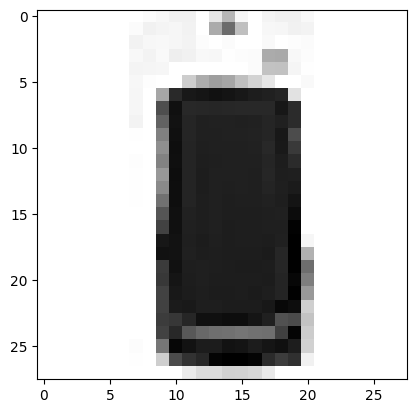

In [61]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [63]:
import numpy as np
np.round(model.predict(val_scaled[:5]), decimals=2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[0.44, 0.  , 0.02, 0.23, 0.01, 0.  , 0.1 , 0.  , 0.21, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.59, 0.  , 0.  , 0.  , 0.  , 0.  , 0.41, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.06, 0.  , 0.93, 0.  , 0.01, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [64]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [65]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9014 - loss: 0.2826


[0.27968737483024597, 0.8988999724388123]

In [66]:
test_input.shape

(10000, 28, 28)